In [8]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [9]:
datatransporte = pd.read_csv('afluencia-preliminar-en-transporte-publico.csv' , encoding='utf-8')

ANALISIS EXPLORATORIO!

In [10]:
datatransporte.tail(20)

,id,organismo,linea_servicio,dia,fecha,afluencia_tarjeta,afluencia_boleto,afluencia_total_preliminar
18694,18695,Suburbano,L1,Domingo,2021-06-13,NaN,NaN,"43,027"
18695,18696,Suburbano,L1,Lunes,2021-06-14,NaN,NaN,"93,258"
18696,18697,Suburbano,L1,Martes,2021-06-15,NaN,NaN,"93,285"
18697,18698,Suburbano,L1,Miércoles,2021-06-16,NaN,NaN,"97,223"
18698,18699,Suburbano,L1,Jueves,2021-06-17,NaN,NaN,"95,026"
18699,18700,Suburbano,L1,Viernes,2021-06-18,NaN,NaN,"100,807"
18700,18701,Suburbano,L1,Sábado,2021-06-19,NaN,NaN,"82,796"
18701,18702,Suburbano,L1,Domingo,2021-06-20,NaN,NaN,"45,409"
18702,18703,Suburbano,L1,Lunes,2021-06-21,NaN,NaN,"92,588"
18703,18704,Suburbano,L1,Martes,2021-06-22,NaN,NaN,"94,236"


In [11]:
#Cual es la columna con mas datos no nulos
datatransporte.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18714 entries, 0 to 18713
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   id                          18714 non-null  int64 
 1   organismo                   18714 non-null  object
 2   linea_servicio              18225 non-null  object
 3   dia                         18714 non-null  object
 4   fecha                       18714 non-null  object
 5   afluencia_tarjeta           2687 non-null   object
 6   afluencia_boleto            3598 non-null   object
 7   afluencia_total_preliminar  18512 non-null  object
dtypes: int64(1), object(7)
memory usage: 1.1+ MB


In [12]:
#Cual es la columna con mas datos no nulos
datatransporte.isnull().sum()

id                                0
organismo                         0
linea_servicio                  489
dia                               0
fecha                             0
afluencia_tarjeta             16027
afluencia_boleto              15116
afluencia_total_preliminar      202
dtype: int64

In [13]:
#llenamos los valores NAN
datatransporte['afluencia_total_preliminar'] = datatransporte['afluencia_total_preliminar'].fillna((0),inplace=False)
datatransporte['afluencia_boleto'] = datatransporte['afluencia_boleto'].fillna((0),inplace=False)
datatransporte['afluencia_tarjeta'] = datatransporte['afluencia_boleto'].fillna((0),inplace=False)

In [14]:
# Cambiar valores object a numericos para facilitar la manipulacion de la data diapositiva 9
datatransporte['afluencia_total_preliminar']= datatransporte['afluencia_total_preliminar'].str.replace(',', '')
datatransporte['afluencia_boleto']= datatransporte['afluencia_boleto'].str.replace(',', '')
datatransporte['afluencia_tarjeta']= datatransporte['afluencia_boleto'].str.replace(',', '')

In [15]:
# Cambiar valores object a numericos para facilitar la manipulacion de la data
datatransporte['afluencia_total_preliminar']= datatransporte['afluencia_total_preliminar'].apply(pd. to_numeric)
datatransporte['afluencia_boleto']= datatransporte['afluencia_boleto'].apply(pd. to_numeric)
datatransporte['afluencia_tarjeta']= datatransporte['afluencia_boleto'].apply(pd. to_numeric)

In [16]:
# Cambiar valores a formato fecha
datatransporte['fecha'] = pd.to_datetime(datatransporte['fecha'])

In [17]:
#comprobando los tipos
datatransporte.dtypes

id                                     int64
organismo                             object
linea_servicio                        object
dia                                   object
fecha                         datetime64[ns]
afluencia_tarjeta                    float64
afluencia_boleto                     float64
afluencia_total_preliminar           float64
dtype: object

In [18]:
#Cual es el organismo mas usado?
transportemas = datatransporte.groupby('organismo')['afluencia_total_preliminar'].agg(['sum','count', 'max'])
transportemas.sort_values('sum',ascending=False)

,sum,count,max
organismo,,,
STC,1.022922e+09,5856,874324.0
Metrobús,3.019027e+08,3443,545082.0
RTP,9.093083e+07,3599,220754.0
STE-Trolebús,4.424603e+07,4042,92150.0
Suburbano,3.260932e+07,480,197740.0
STE-Tren Ligero,1.230674e+07,486,105281.0
Ecobici,4.672818e+06,488,31855.0
STE-Cablebús,3.850480e+05,118,7897.0


In [19]:
#CUal es la linea de servicio mas utilizada
lineaemas = datatransporte.groupby('linea_servicio')['afluencia_total_preliminar'].agg(['sum','count', 'max'])
lineaemas.sort_values('sum',ascending=False)

,sum,count,max
linea_servicio,,,
L1,282218802.0,1455,758938.0
L2,181470897.0,975,874324.0
L3,168816310.0,975,797913.0
LB,101715310.0,488,481177.0
L5,94596366.0,975,297387.0
L8,90264901.0,488,436398.0
L7,89482578.0,975,380664.0
LA,83532311.0,488,280904.0
L12,78835682.0,488,470842.0


In [20]:
# ¿Cuáles son las columnas con mayor cantidad de datos nulos?  Diapositiva 10
percentnull =((datatransporte.isnull().sum() / len(datatransporte))*100)
percentnull

id                             0.000000
organismo                      0.000000
linea_servicio                 2.613017
dia                            0.000000
fecha                          0.000000
afluencia_tarjeta             80.773752
afluencia_boleto              80.773752
afluencia_total_preliminar     1.079406
dtype: float64

<AxesSubplot:>

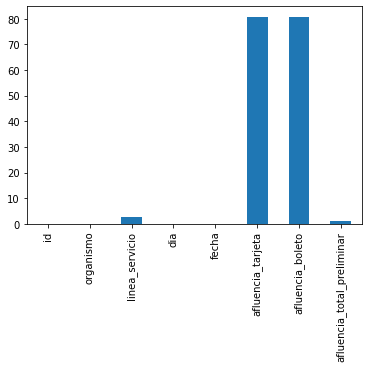

In [21]:
#Grafica valores nulos
percentnull.plot(kind = 'bar')

In [22]:
#Funcion con grafica valores nulos por organismo diapositiva 13
def g_miss (organismo:str):
  df=pd.DataFrame(datatransporte[datatransporte['organismo']==organismo])
  fig=px.bar(x=df.columns, y= df.isnull().sum()/df.shape[0]*100,
              title = 'porcentaje de valores nulos',height =400, width=700)
  
  return fig.show()


In [23]:
g_miss('Ecobici')

In [24]:
#Funcion grafica por columna diapositiva 14
def nullcolumn(columna):
  col=datatransporte[columna].isnull().groupby(datatransporte['organismo']).sum()*100/(datatransporte[columna].isnull().sum())
  fig=px.bar(col)
  fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})

  return fig.show()

In [25]:
nullcolumn('afluencia_tarjeta')

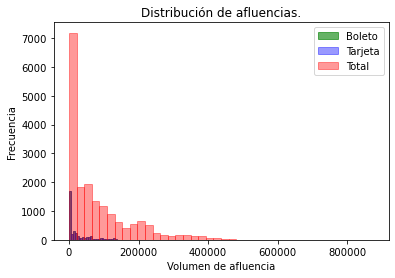

In [26]:
#Histograma distriubcion de frecuencia y volumen de afluencia Diapositiva 16
plt.hist(datatransporte['afluencia_boleto'], edgecolor='green', color='green', alpha=0.6, bins = 40, label='Boleto')
plt.hist(datatransporte['afluencia_tarjeta'], edgecolor='blue', color = 'blue', alpha=0.4, bins = 40, label='Tarjeta')
plt.hist(datatransporte['afluencia_total_preliminar'], edgecolor='red', color = 'red', alpha=0.4, bins = 40, label='Total')

plt.title('Distribución de afluencias.')
plt.legend(loc='best')
plt.xlabel('Volumen de afluencia')
plt.ylabel('Frecuencia')
plt.show()

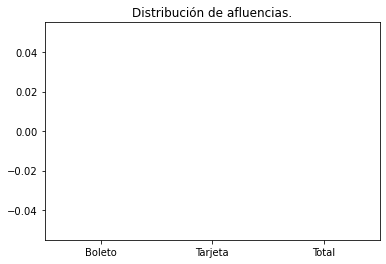

In [27]:
#Boxplot Diapositiva 17
boleto = datatransporte['afluencia_boleto']
tarjeta = datatransporte['afluencia_tarjeta']
total = datatransporte['afluencia_total_preliminar']
 
plt.boxplot([datatransporte['afluencia_boleto'], datatransporte['afluencia_tarjeta'], datatransporte['afluencia_total_preliminar']],
            patch_artist = False, labels = ['Boleto', 'Tarjeta', 'Total'])
plt.title('Distribución de afluencias.')
plt.show()

In [28]:
# Que dia de la semana tiene mas uso el transporte publico? DIapositiva 18
diamas = datatransporte.groupby('dia')['afluencia_total_preliminar'].agg(['sum','count', 'max'])
diamas.sort_values('sum',ascending=False)

,sum,count,max
dia,,,
Martes,239477843.0,2667,820067.0
Jueves,238240944.0,2649,802291.0
Viernes,237182340.0,2626,874324.0
Lunes,228317986.0,2665,770843.0
Miércoles,202951991.0,2246,807048.0
Sábado,197344970.0,2615,747252.0
Domingo,128866694.0,2631,454374.0
Míercoles,37592985.0,413,303257.0


In [29]:
#Heat Map dia mas transitado y organismoDiapositiva 19
heatmap1 = datatransporte.groupby(['organismo', 'dias'], as_index = False).agg({'afluencia_total_preliminar': 'sum'})

heatmap_day = heatmap1.pivot(index = 'organismo', columns ='dia', values = 'afluencia_total_preliminar')
sns.heatmap(heatmap_day)

KeyError: 'dias'

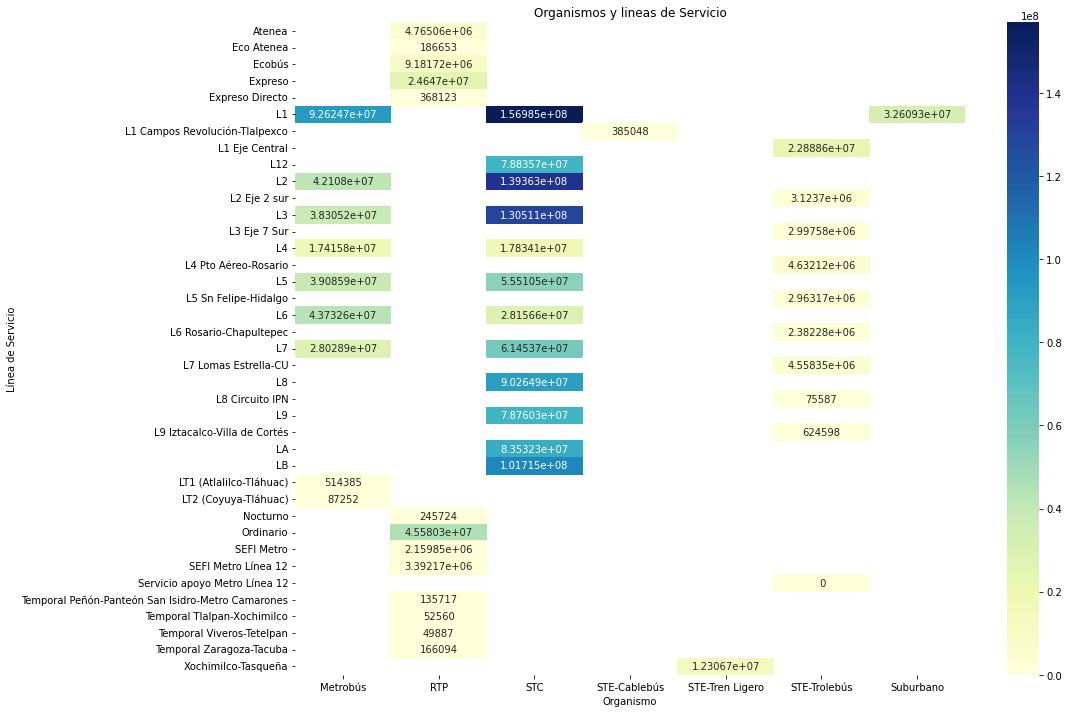

In [ ]:
#¿Cuál es la combinación de organismo y línea de servicio con más usuarios? Diapositiva 20
transporte= datatransporte.groupby(['organismo', 'linea_servicio'], as_index = False).agg({'afluencia_total_preliminar': 'sum'}).sort_values(['afluencia_total_preliminar'],ascending=False)

plt.figure(figsize = (15,12))

transporteorg = transporte.pivot(index = 'linea_servicio', columns ='organismo', values = 'afluencia_total_preliminar')
heat_transporte = sns.heatmap(transporteorg, annot= True, cmap='YlGnBu', fmt='2g')

heat_transporte.set(xlabel='Organismo', ylabel='Línea de Servicio', title = 'Organismos y lineas de Servicio')

heat_transporte

In [ ]:
#¿Cuál es la línea de servicio más utilizada? diapositiva 21
stc = datatransporte[datatransporte['organismo'] == 'STC']
stc = stc.groupby('linea_servicio')['afluencia_total_preliminar'].sum().sort_values(ascending=False)

stc = stc /sum(stc) * 100
stc.round(2)

linea_servicio
L1     15.35
L2     13.62
L3     12.76
LB      9.94
L8      8.82
LA      8.17
L12     7.71
L9      7.70
L7      6.01
L5      5.43
L6      2.75
L4      1.74
Name: afluencia_total_preliminar, dtype: float64

TRANSFORMACION DE DATOS

In [ ]:
#Eliminacion de datos nulos Diapositiva 22
nulos = datatransporte 
nulos = nulos.dropna(how = 'any')

exploracion = nulos.shape[0] / datatransporte.shape[0] * 100
exploracion = round(exploracion, 2)

print(exploracion)

19.23


In [ ]:
#¿Cuántos valores duplicados hay?  Diapositiva 23
datatransporte.duplicated().sum()

0

In [ ]:
#Cambiando Formatos Diapositiva 24
datatransporte['fecha'].dt.weekday
datatransporte['fecha'].dt.day

0         1
1         2
2         3
3         4
4         5
         ..
18709    28
18710    29
18711    30
18712     1
18713     2
Name: fecha, Length: 18714, dtype: int64

In [ ]:
#Limpieza de datos Diapositiva 25
contar = datatransporte[datatransporte['organismo'] == 'Metrobús'].shape[0]

contiene = datatransporte[datatransporte['organismo'].str.contains('Metrob')].shape[0]

print(contar)
print(contiene)

3461
3461


In [ ]:
#Diapositiva 26
temporal = datatransporte[datatransporte['linea_servicio'].str.contains('Temporal', na=False)]
temporal['linea_servicio'].nunique()

4